# EDA of Machine Downtime Data 

In [1]:
#! pip install pandas numpy matplotlib seaborn scipy  psycopg2 



In [2]:
import psycopg2
import psycopg2.extras               #Package for DB connect with postgre sql
import pandas as pd                  # Data manipulation and analysis
import numpy as np                   # Numerical computing
import matplotlib.pyplot as plt      # Data visualization
import seaborn as sns                # Enhanced data visualization
import scipy.stats as stats          # Statistical functions



### Esatblish Connection with POSTGRES sql and Import Raw data

In [3]:
#Establish a connection to PostgreSQL database
conn = psycopg2.connect(
     host = "localhost",
     port = "5432",
     database = "postgres",
     user = "postgres",
     password = "**********"
)
cur = conn.cursor(cursor_factory = psycopg2.extras.DictCursor)



In [4]:
cur.execute("SELECT * FROM machine_downtime")
# Fetch all rows from the cursor
rows = cur.fetchall()

# Get the column names from the cursor description
columns = [desc[0] for desc in cur.description]

# Create a DataFrame from the fetched data
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cur.close()
conn.close()


In [5]:
df.head()

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime,machine_failure
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933724915,6.284964506,25.6,46,33.4,1.291,26.492,25892.0,335,24.05532601,3.58,Machine_Failure,Yes
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936891865,6.19673253,35.3,47.4,34.6,1.382,25.274,19856.0,368,14.20288973,2.68,Machine_Failure,Yes
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413159,6.655448451,13.1,40.7,33,1.319,30.608,19851.0,325,24.04926704,3.55,Machine_Failure,Yes
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382007,6.560393963,24.4,44.2,40.6,0.618,30.791,18461.0,360,25.86002925,3.55,Machine_Failure,Yes
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893181921,6.141237748,4.1,47.3,31.4,0.983,25.516,26526.0,354,25.51587386,3.55,Machine_Failure,Yes


In [6]:



# save the file as csv for future reference
df.to_csv('output.csv', index=False)

In [7]:
# import the csv file as 'md'(machine_downtime)
md = pd.read_csv('output.csv')

### Data Understanding

In [8]:
md.head()

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime,machine_failure
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,Yes
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,Yes
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,Yes
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,Yes
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,Yes


In [9]:
md.tail()

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime,machine_failure
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure,No
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure,No
2497,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure,No
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure,No
2499,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure,Yes


In [10]:
md.shape

(2500, 17)

In [11]:
md.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2500 entries, 0 to 2499

Data columns (total 17 columns):

 #   Column                       Non-Null Count  Dtype  

---  ------                       --------------  -----  

 0   date                         2500 non-null   object 

 1   machine_id                   2500 non-null   object 

 2   assembly_line_no             2500 non-null   object 

 3   hydraulic_pressure           2490 non-null   float64

 4   coolant_pressure             2481 non-null   float64

 5   air_system_pressure          2483 non-null   float64

 6   coolant_temperature          2488 non-null   float64

 7   hydraulic_oil_temperature    2484 non-null   float64

 8   spindle_bearing_temperature  2493 non-null   float64

 9   spindle_vibration            2489 non-null   float64

 10  tool_vibration               2489 non-null   float64

 11  spindle_speed                2494 non-null   float64

 12  voltage                      2494 non-null   float64

 13  

In [12]:
md.dtypes

date                            object
machine_id                      object
assembly_line_no                object
hydraulic_pressure             float64
coolant_pressure               float64
air_system_pressure            float64
coolant_temperature            float64
hydraulic_oil_temperature      float64
spindle_bearing_temperature    float64
spindle_vibration              float64
tool_vibration                 float64
spindle_speed                  float64
voltage                        float64
torque                         float64
cutting                        float64
downtime                        object
machine_failure                 object
dtype: object

In [13]:
md.columns

Index(['date', 'machine_id', 'assembly_line_no', 'hydraulic_pressure',
       'coolant_pressure', 'air_system_pressure', 'coolant_temperature',
       'hydraulic_oil_temperature', 'spindle_bearing_temperature',
       'spindle_vibration', 'tool_vibration', 'spindle_speed', 'voltage',
       'torque', 'cutting', 'downtime', 'machine_failure'],
      dtype='object')

In [14]:
# check null values if any
null_values = md.isnull()
null_count = null_values.sum()
print(null_count)

date                            0

machine_id                      0

assembly_line_no                0

hydraulic_pressure             10

coolant_pressure               19

air_system_pressure            17

coolant_temperature            12

hydraulic_oil_temperature      16

spindle_bearing_temperature     7

spindle_vibration              11

tool_vibration                 11

spindle_speed                   6

voltage                         6

torque                         21

cutting                         7

downtime                        0

machine_failure                 0

dtype: int64


In [15]:
md.describe()

,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


### Data Cleansing

In [16]:
# Fill null values with constant value
#df.fillna(value = 0, inplace=True)

# Fill null values with mean of the column
md.fillna(md.median(numeric_only = True), inplace =True)

# Interpolate null values 
#df.interpolate(inplace = True)

In [17]:
# Convert date column 'datetime' format
md['date']= pd.to_datetime(md['date'])


#verify the date  column
print(md.dtypes['date'])

datetime64[ns]


In [18]:
# Convert 'machine_failure' column to Categorical
md['machine_failure'] = md['machine_failure'].astype('category')

# verify the data type
print(md.dtypes['machine_failure'])

category


In [19]:
#Verify if any null values exist
md.isna().sum()

date                           0
machine_id                     0
assembly_line_no               0
hydraulic_pressure             0
coolant_pressure               0
air_system_pressure            0
coolant_temperature            0
hydraulic_oil_temperature      0
spindle_bearing_temperature    0
spindle_vibration              0
tool_vibration                 0
spindle_speed                  0
voltage                        0
torque                         0
cutting                        0
downtime                       0
machine_failure                0
dtype: int64

In [20]:
# Checking for duplicate values if any
md.duplicated().sum()

0

### Measures of Central Tendency

In [21]:
# Mode for 'machine_failure ' coulmn which is categorical data type and 'Downtime'
mode_value =md[['machine_failure','downtime']].mode()
print(mode_value)

  machine_failure         downtime

0             Yes  Machine_Failure


In [22]:
md.describe()

,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,101.390501,4.947005,6.499315,18.572560,47.618840,35.063800,1.009328,25.412164,20274.462800,348.996800,25.230035,2.782544
std,30.230060,0.993559,0.405892,8.535867,3.756596,3.759547,0.342143,6.422959,3848.038101,45.321518,6.112952,0.615824
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.470719,4.466685,6.220267,10.475000,45.100000,32.500000,0.778750,21.099750,17919.000000,319.000000,21.704037,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.301071,5.512482,6.779330,25.600000,50.100000,37.600000,1.234250,29.766250,22489.750000,380.000000,30.514008,3.262500
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


### Measures of Dispersion

In [23]:

# Select the columns for dispersion calculation
columns_to_analyze = ['hydraulic_pressure', 'coolant_pressure', 'air_system_pressure', 'coolant_temperature', 'hydraulic_oil_temperature', 'spindle_bearing_temperature', 'spindle_vibration', 'tool_vibration', 'spindle_speed', 'voltage', 'torque', 'cutting']

# Calculate measures of dispersion for the columns
dispersion_measures = pd.DataFrame({
    'min': md[columns_to_analyze].min(),
    'max': md[columns_to_analyze].max(),
    'std': md[columns_to_analyze].std(),
    'var': md[columns_to_analyze].var(),
    'mad': md[columns_to_analyze].mad(),
    'range': md[columns_to_analyze].max() - md[columns_to_analyze].min()
})

# Print the dispersion measures
print(dispersion_measures)



                                    min           max          std  \

hydraulic_pressure           -14.326454    191.000000    30.230060   

coolant_pressure               0.325000     11.350000     0.993559   

air_system_pressure            5.063480      7.973992     0.405892   

coolant_temperature            4.100000     98.200000     8.535867   

hydraulic_oil_temperature     35.200000     61.400000     3.756596   

spindle_bearing_temperature   22.600000     49.500000     3.759547   

spindle_vibration             -0.461000      2.000000     0.342143   

tool_vibration                 2.161000     45.726000     6.422959   

spindle_speed                  0.000000  27957.000000  3848.038101   

voltage                      202.000000    479.000000    45.321518   

torque                         0.000000     55.552400     6.112952   

cutting                        1.800000      3.930000     0.615824   



                                      var          mad         range  

hyd

C:\Users\HP\AppData\Local\Temp\ipykernel_13748\1547455761.py:10: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

  'mad': md[columns_to_analyze].mad(),


### Outlier Detection

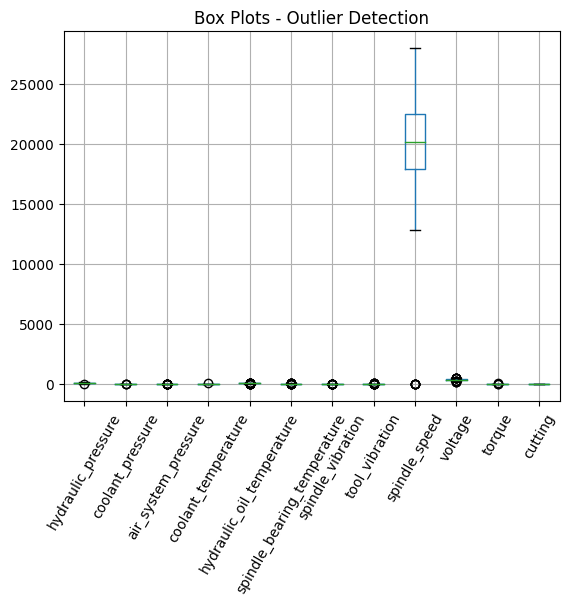

In [24]:
# Select the columns for outlier detection
columns_to_analyze = ['hydraulic_pressure', 'coolant_pressure', 'air_system_pressure',
                      'coolant_temperature', 'hydraulic_oil_temperature', 'spindle_bearing_temperature',
                      'spindle_vibration', 'tool_vibration', 'spindle_speed', 'voltage', 'torque', 'cutting']

# Create box plots for outlier detection
md[columns_to_analyze].boxplot()
plt.xticks(rotation=60)
plt.title('Box Plots - Outlier Detection')
plt.show()

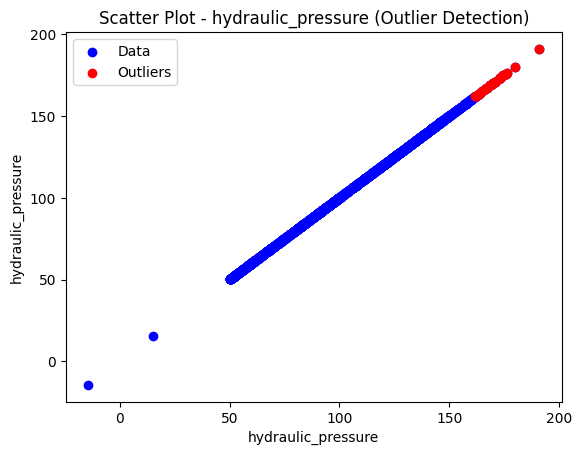

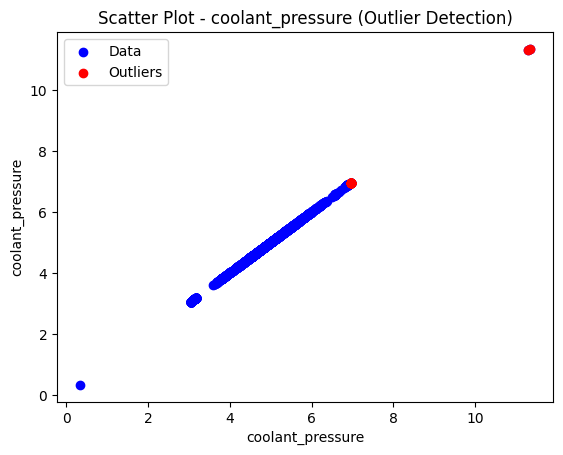

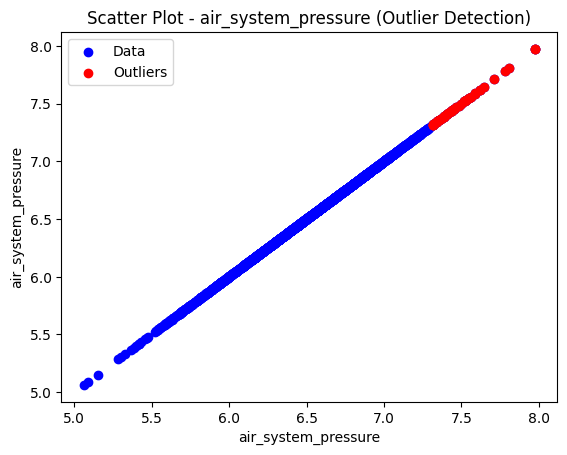

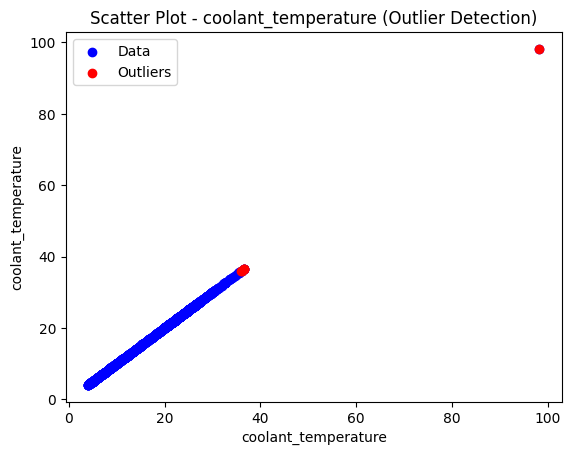

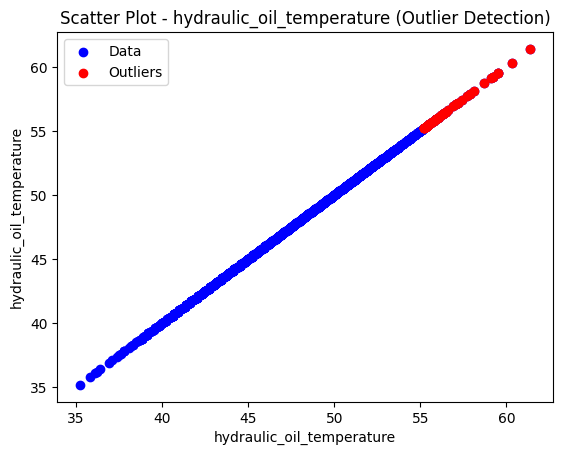

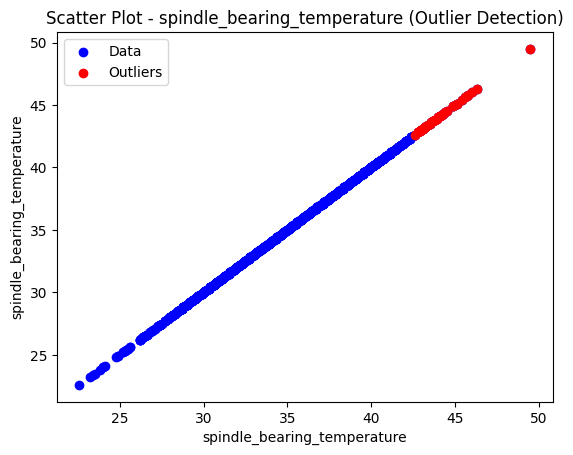

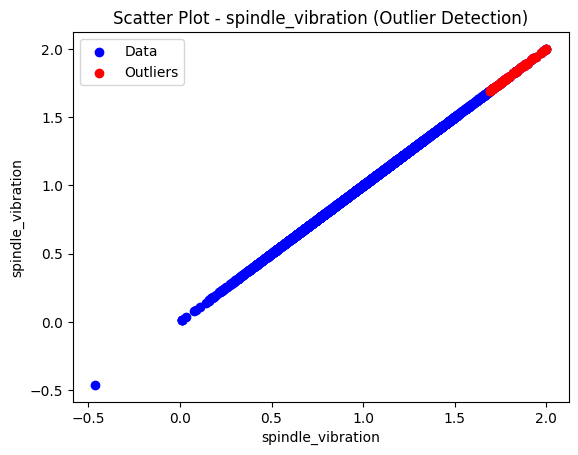

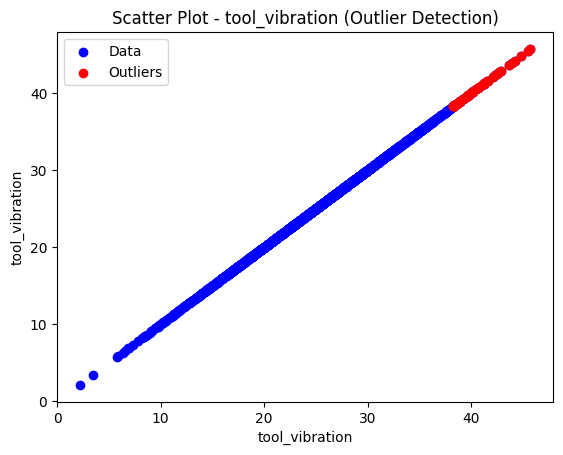

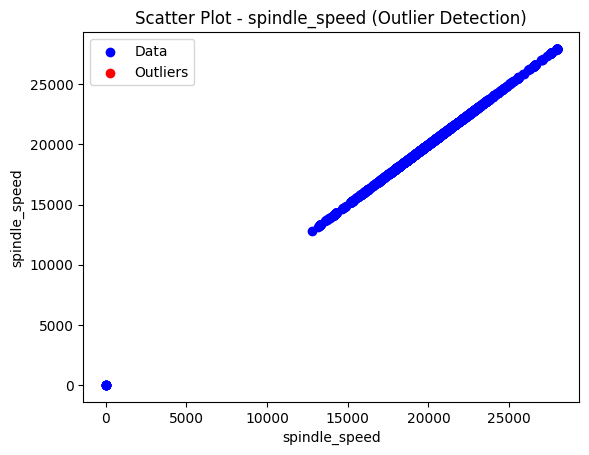

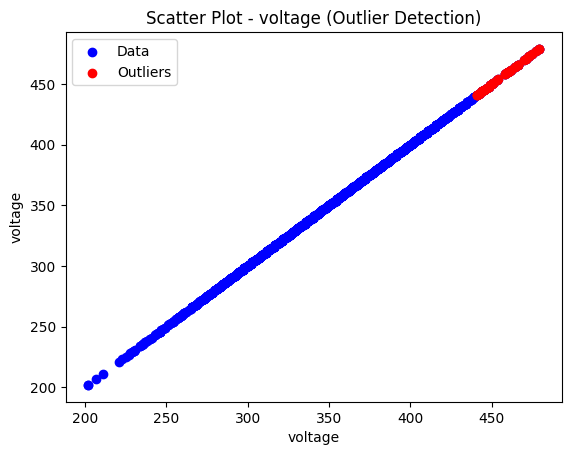

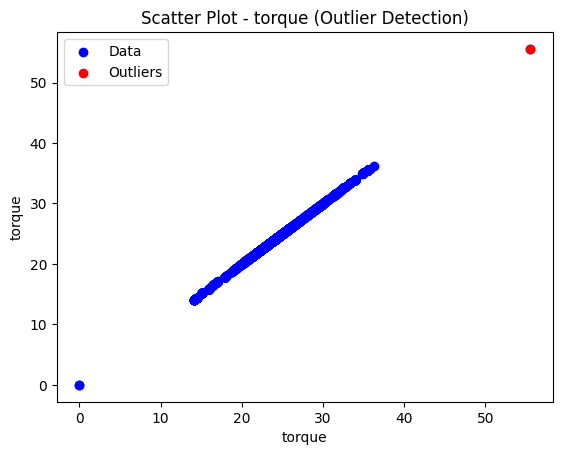

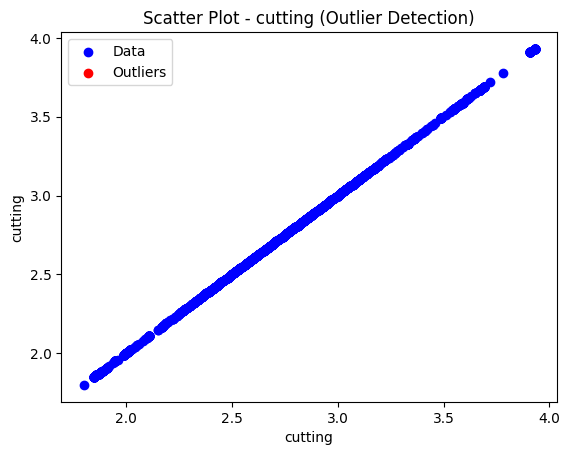

In [25]:
# Set the matplotlib backend to display inline
%matplotlib inline

# Create scatter plots for outlier detection
for column in columns_to_analyze:
    plt.scatter(md[column], md[column], c='blue', label='Data')
    
    # Identify outliers and change their color to red
    outliers = md[column].loc[md[column] > md[column].mean() + 2 * md[column].std()]
    plt.scatter(outliers, outliers, c='red', label='Outliers')
    
    plt.xlabel(column)
    plt.ylabel(column)
    plt.title(f'Scatter Plot - {column} (Outlier Detection)')
    plt.legend()
    plt.show()





### Correlation of Variables

In [26]:
column_corr = md.corr(numeric_only = True)
print("Correlation of Columns :")
print(column_corr)

Correlation of Columns :

                             hydraulic_pressure  coolant_pressure  \

hydraulic_pressure                     1.000000         -0.074172   

coolant_pressure                      -0.074172          1.000000   

air_system_pressure                   -0.029626         -0.028545   

coolant_temperature                   -0.110024          0.007505   

hydraulic_oil_temperature              0.008757          0.001206   

spindle_bearing_temperature            0.022682         -0.012655   

spindle_vibration                     -0.006549          0.005601   

tool_vibration                         0.020717         -0.005029   

spindle_speed                         -0.119812          0.088646   

voltage                               -0.004094          0.030958   

torque                                 0.161633         -0.102676   

cutting                               -0.221135          0.168051   



                             air_system_pressure  coolant_temp

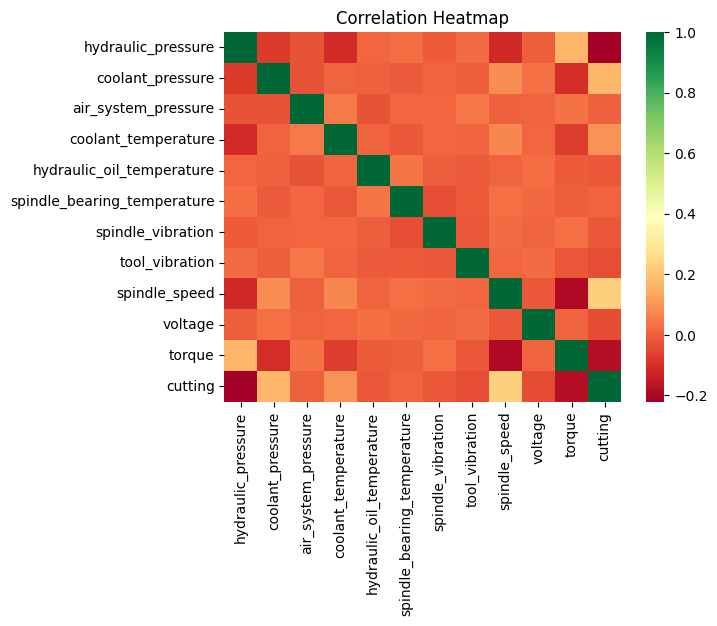

In [27]:
 #Set the matplotlib backend to display inline
%matplotlib inline

# Create the heatmap with color scheme
sns.heatmap(column_corr, cmap='RdYlGn', xticklabels=column_corr.columns, yticklabels=column_corr.columns)
plt.title('Correlation Heatmap')
plt.show()

### Skewness

In [28]:
skewness=md.skew(numeric_only=True)
print(skewness)

hydraulic_pressure             0.199274

coolant_pressure               0.147806

air_system_pressure           -0.053378

coolant_temperature            0.104172

hydraulic_oil_temperature     -0.002716

spindle_bearing_temperature   -0.036074

spindle_vibration              0.001587

tool_vibration                -0.061228

spindle_speed                 -0.172424

voltage                       -0.028693

torque                         0.033119

cutting                        0.114157

dtype: float64


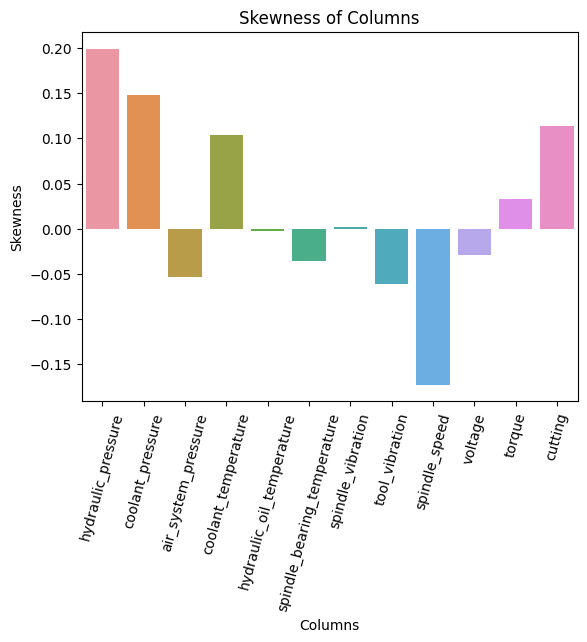

In [29]:
%matplotlib inline

# Create a bar plot of skewness
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.show()

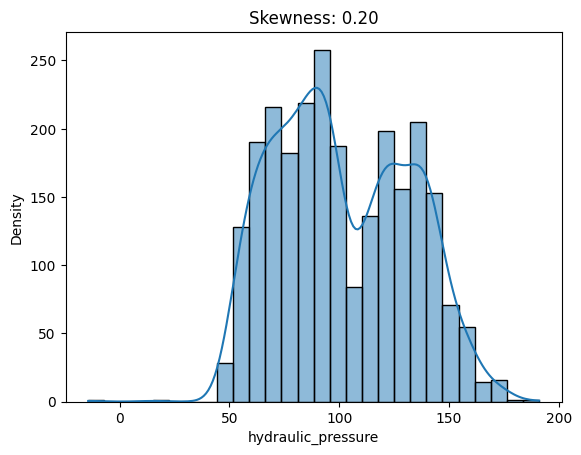

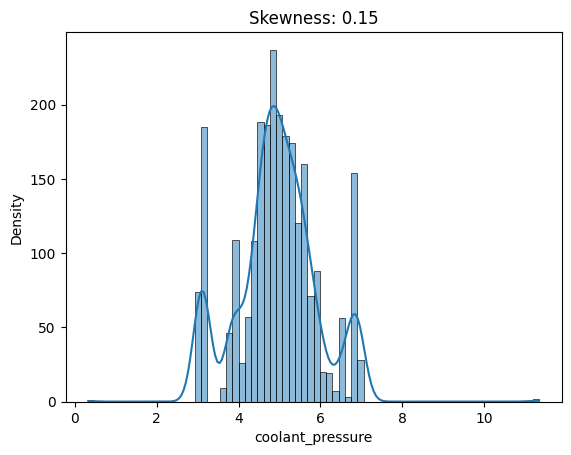

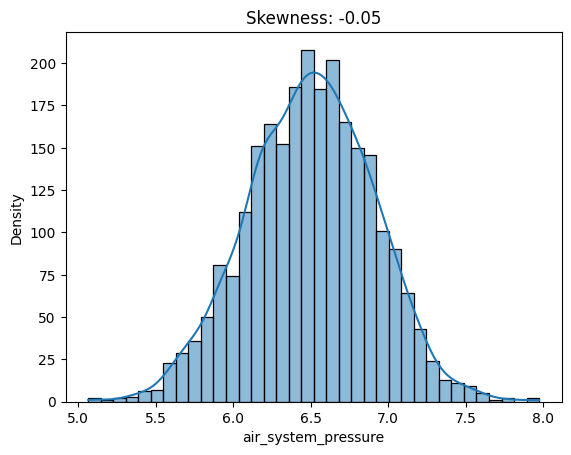

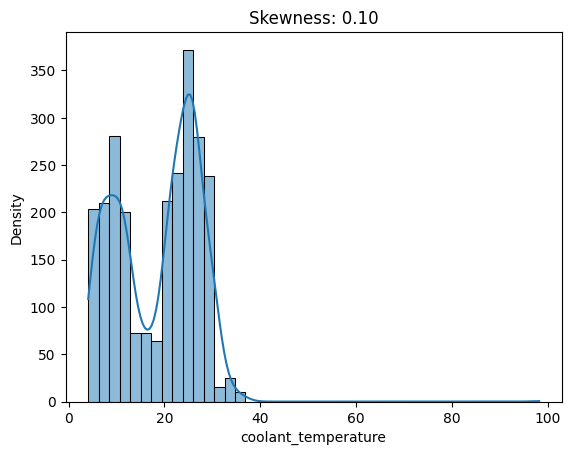

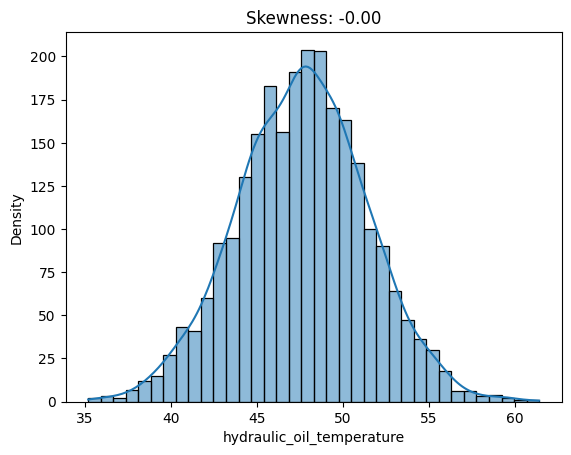

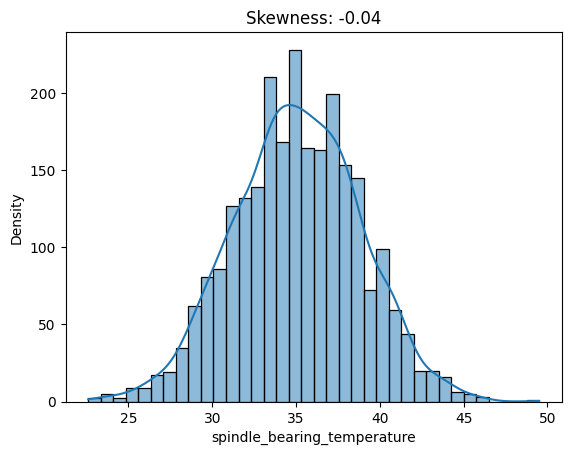

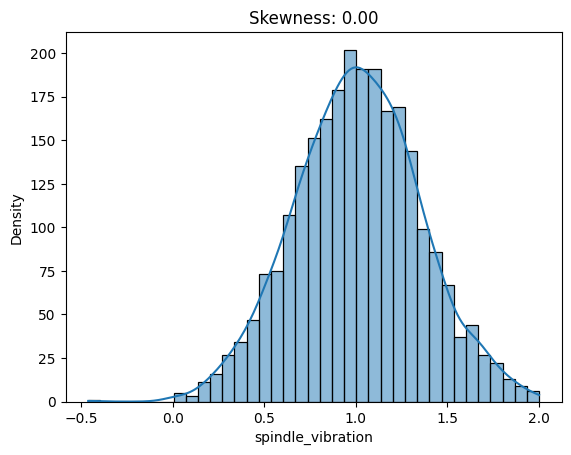

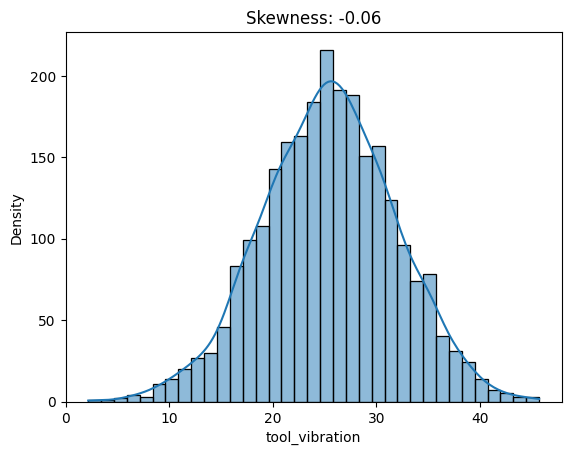

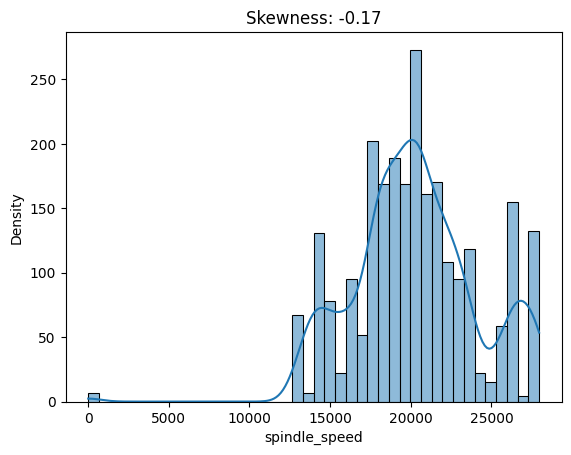

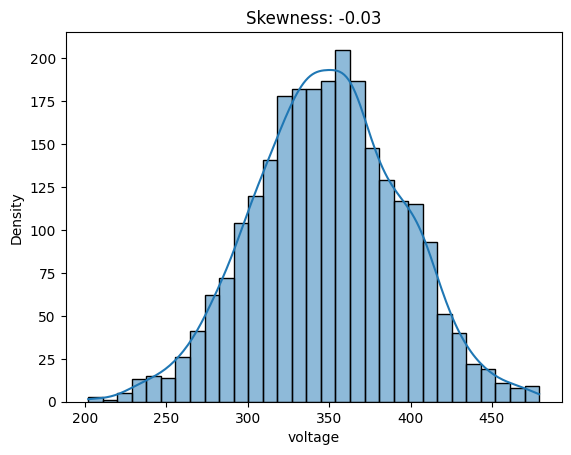

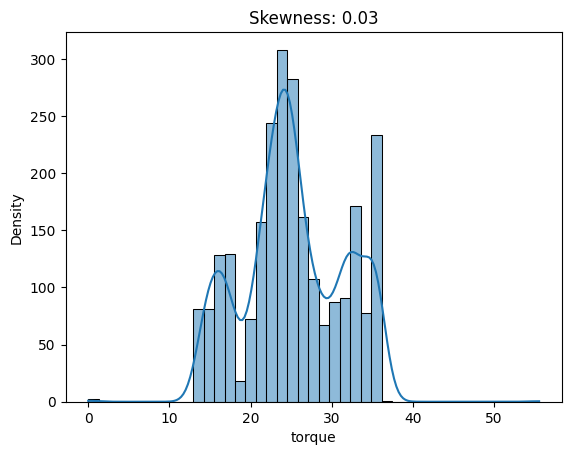

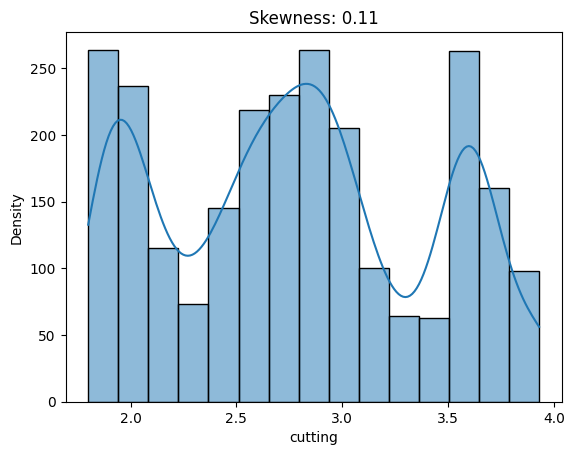

In [30]:
for column in columns_to_analyze:
  plt.figure()
  sns.histplot(data=md, x=column, kde=True)
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Skewness: {skewness[column]:.2f}')
  plt.show()


### Kurtosis of Variables

In [31]:
# Calculate the kurtosis for each column
kurtosis_values = md.kurtosis(numeric_only = True)
print(kurtosis_values)

hydraulic_pressure            -0.911830

coolant_pressure               1.201405

air_system_pressure            0.018971

coolant_temperature            1.581860

hydraulic_oil_temperature      0.057724

spindle_bearing_temperature   -0.035556

spindle_vibration             -0.005537

tool_vibration                 0.019749

spindle_speed                  1.355132

voltage                       -0.083325

torque                        -0.444431

cutting                       -1.081785

dtype: float64


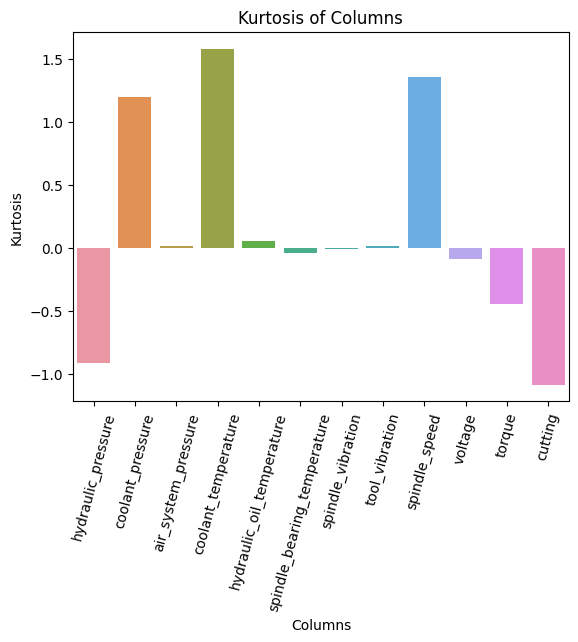

In [32]:
%matplotlib inline

# Create a bar plot of kurtosis
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Columns')
plt.show()

1)What is the proportion of machine downtime occurrences in the dataset?

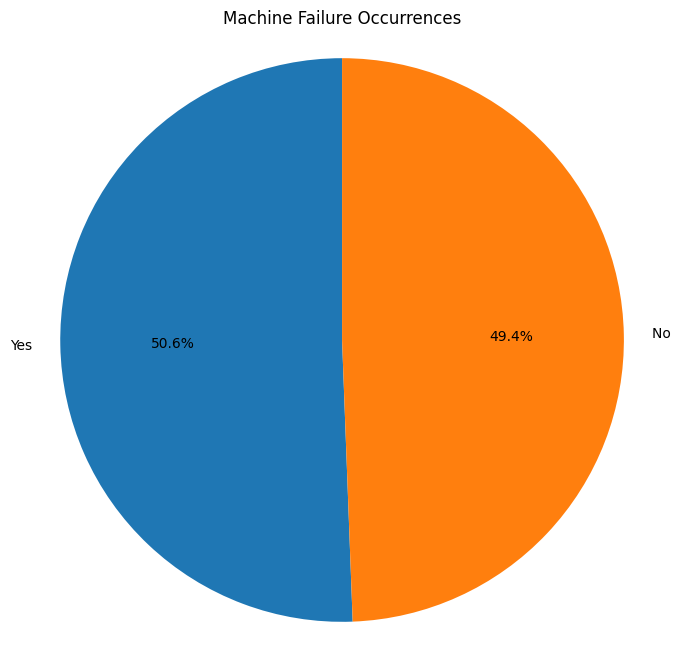

In [33]:
# Count the occurrences of machine failure
failure_counts = md['machine_failure'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Machine Failure Occurrences')
plt.axis('equal')
plt.show()

 2)What is the distribution of downtime occurrences across different dates? Are there any specific periods or trends where downtime is more prevalent?

In [34]:

machine_downtime_counts  = md[(md.machine_failure =="Yes")]

In [35]:
machine_downtime_counts

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime,machine_failure
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,Yes
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,Yes
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,Yes
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,Yes
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.851332,6.336146,28.7,49.0,35.9,0.231,23.023,19573.0,307.0,15.900716,2.63,Machine_Failure,Yes
2490,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,55.54,4.841605,6.852283,26.4,42.9,36.2,1.436,24.819,26526.0,348.0,15.119739,2.53,Machine_Failure,Yes
2491,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,90.53,6.839413,5.698765,9.4,52.5,40.9,1.271,31.573,27613.0,377.0,16.964105,3.67,Machine_Failure,Yes
2492,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.842521,6.136585,21.5,49.6,42.3,0.432,37.423,19536.0,402.0,24.437039,2.84,Machine_Failure,Yes


In [36]:
mdc = machine_downtime_counts.groupby('date')['machine_failure'].count()

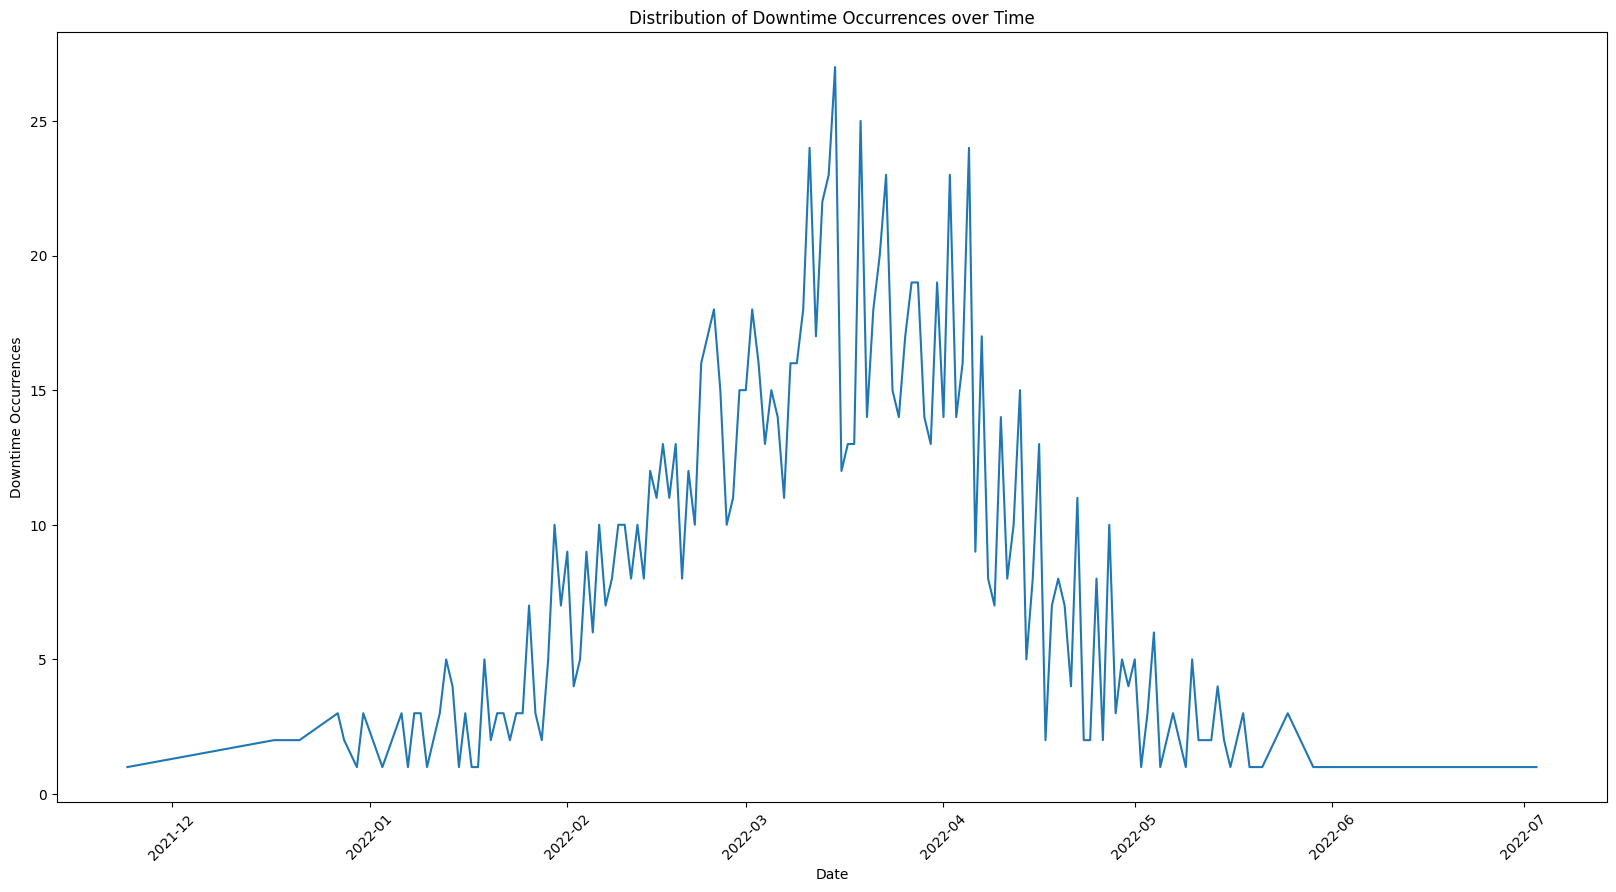

In [37]:
# Plot the distribution of downtime occurrences over time
plt.figure(figsize=(20, 10))
plt.plot(mdc.index,mdc.values)
plt.xlabel('Date')
plt.ylabel('Downtime Occurrences')
plt.title('Distribution of Downtime Occurrences over Time')
plt.xticks(rotation=45)
plt.show()

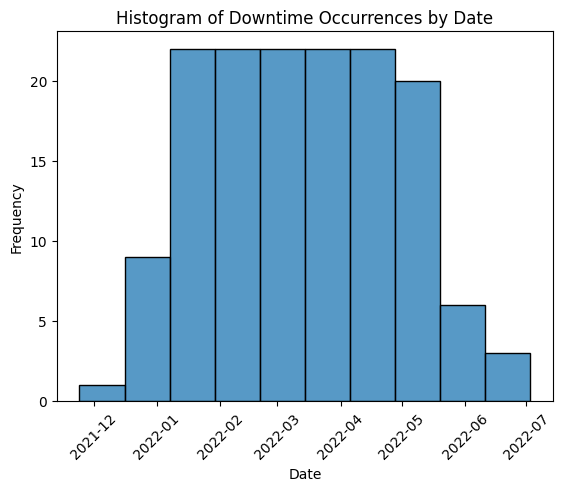

In [38]:
# Plot the histogram by date
sns.histplot(data=mdc, x='date', bins=10)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Downtime Occurrences by Date')
plt.xticks(rotation=45)
plt.show()

3)Which machine(s) (identified by Machine_ID) experience the highest frequency or duration of unplanned downtime?

In [39]:
mdc_mid = machine_downtime_counts.groupby('machine_id')['machine_failure'].count()

In [40]:
mdc_mid

machine_id
Makino-L1-Unit1-2013    454
Makino-L2-Unit1-2015    396
Makino-L3-Unit1-2015    415
Name: machine_failure, dtype: int64

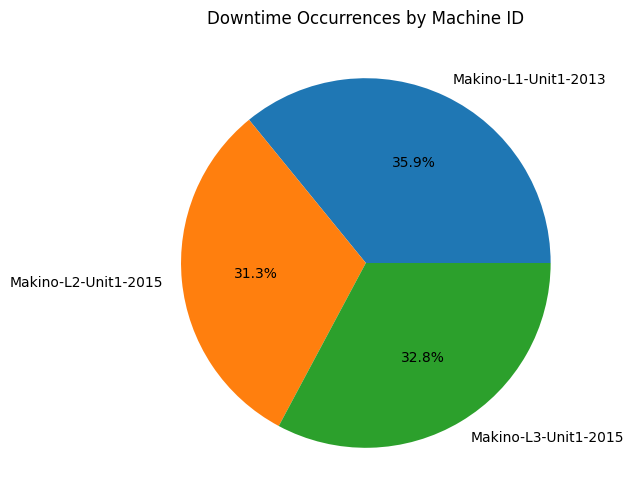

In [41]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mdc_mid, labels=mdc_mid.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Machine ID')
plt.show()

4)Are there any noticeable differences in downtime patterns between different assembly lines (Assembly_Line_No)?

In [43]:
mdc_malno = machine_downtime_counts.groupby('assembly_line_no')['machine_failure'].count()

In [44]:
mdc_malno

assembly_line_no
Shopfloor-L1    454
Shopfloor-L2    396
Shopfloor-L3    415
Name: machine_failure, dtype: int64

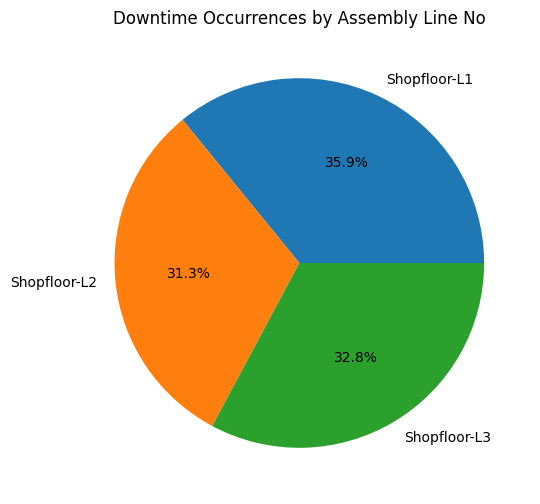

In [45]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mdc_malno, labels=mdc_malno.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Assembly Line No')
plt.show()

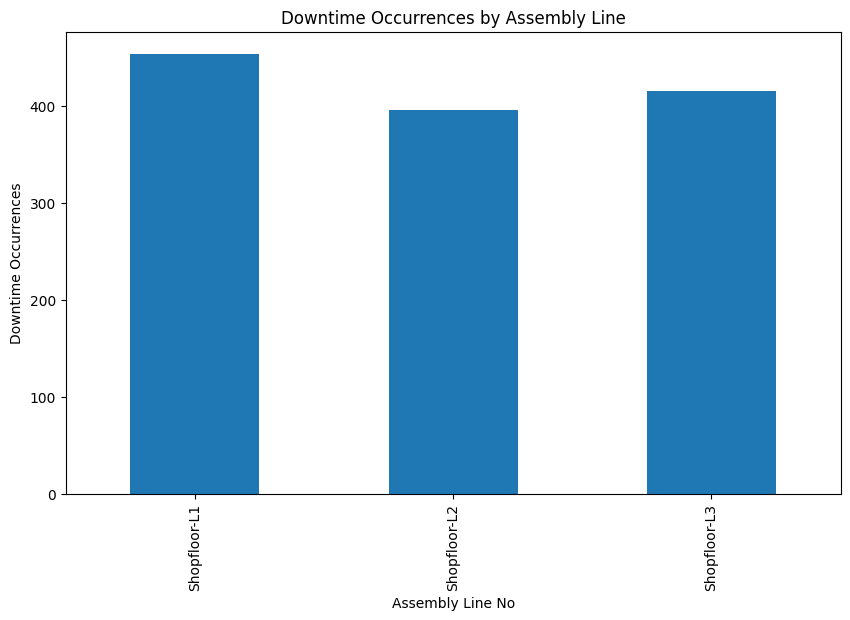

In [46]:
# Plot the downtime occurrences by assembly line
plt.figure(figsize=(10, 6))
mdc_malno.plot(kind='bar')
plt.xlabel('Assembly Line No')
plt.ylabel('Downtime Occurrences')
plt.title('Downtime Occurrences by Assembly Line')
plt.show()

5)Can we identify specific temperature or vibration thresholds (Coolant Temperature, Spindle Vibration, Tool Vibration) that are associated with increased downtime?

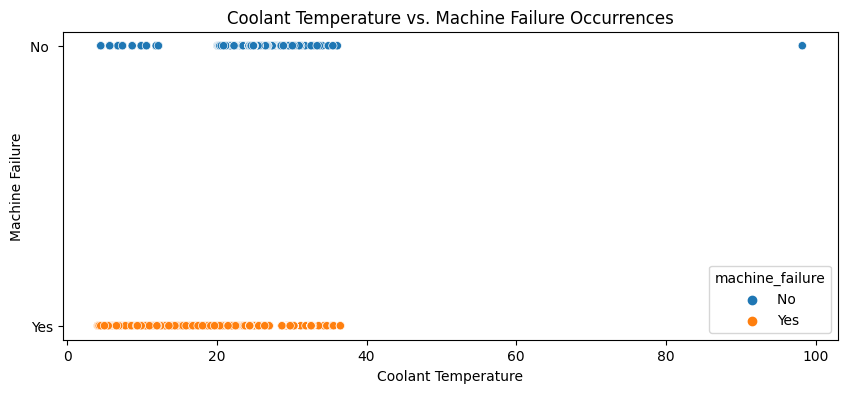

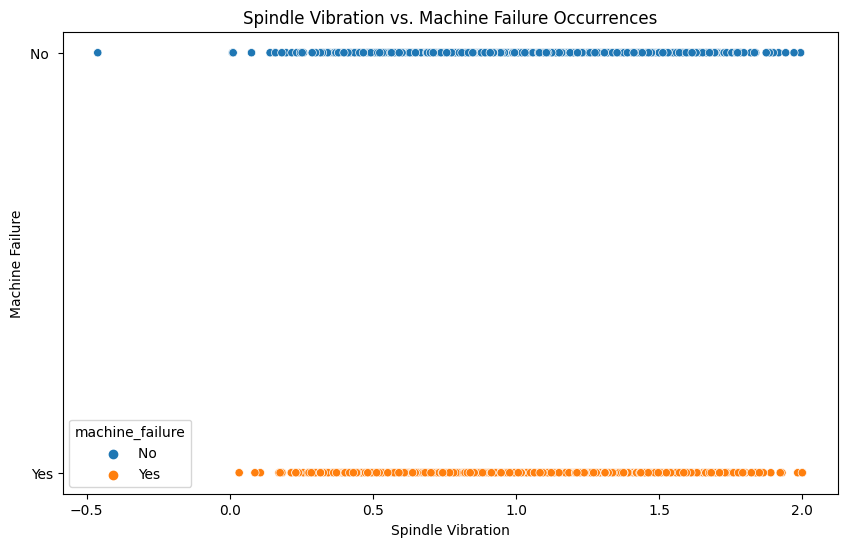

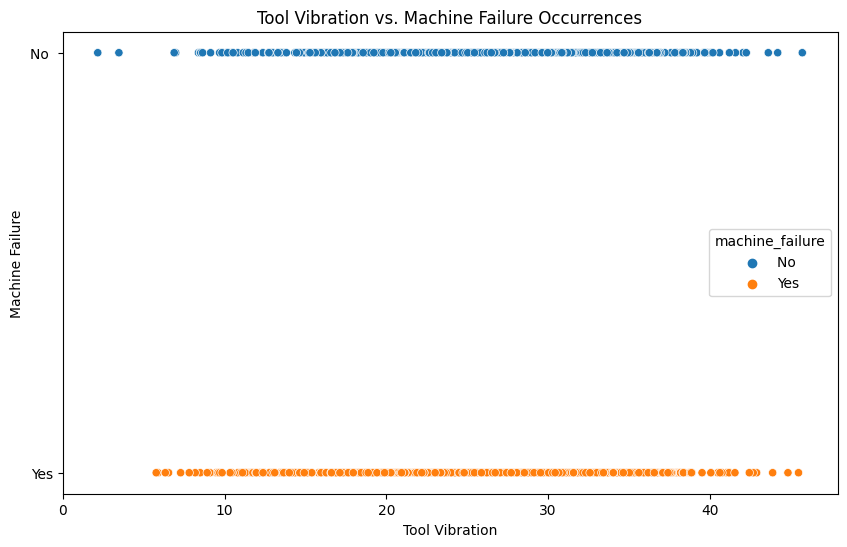

In [47]:


# Scatter plot of coolant temperature vs. machine failure occurrences
plt.figure(figsize=(10,4))
sns.scatterplot(data=md, x='coolant_temperature', y='machine_failure', hue='machine_failure')
plt.xlabel('Coolant Temperature')
plt.ylabel('Machine Failure')
plt.title('Coolant Temperature vs. Machine Failure Occurrences')
plt.show()


# Scatter plot of spindle vibration vs. machine failure occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=md, x='spindle_vibration', y='machine_failure', hue='machine_failure')
plt.xlabel('Spindle Vibration')
plt.ylabel('Machine Failure')
plt.title('Spindle Vibration vs. Machine Failure Occurrences')
plt.show()

# Scatter plot of tool vibration vs. machine failure occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=md, x='tool_vibration', y='machine_failure', hue='machine_failure')
plt.xlabel('Tool Vibration')
plt.ylabel('Machine Failure')
plt.title('Tool Vibration vs. Machine Failure Occurrences')
plt.show()


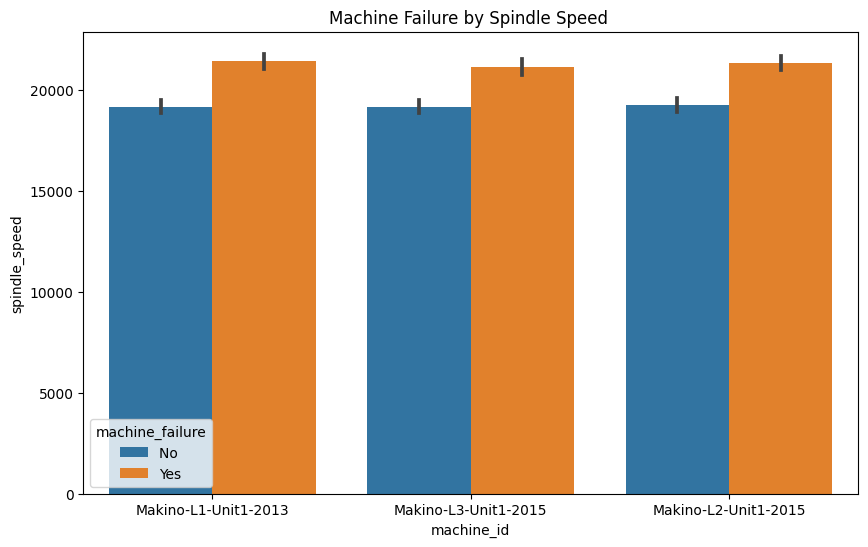

In [55]:
plt.figure(figsize=(10,6))
sns.barplot( x= 'machine_id', y  ='spindle_speed', data = md, hue ='machine_failure')
plt.title("Machine Failure by Spindle Speed ")
plt.show()